## TP1 Apprentissage - Clustering
Gaumart Siméon - 5SDBD-B1

# 1) Jeux de données

# Importation des données sous format exploitable

In [40]:
path = "clustering-benchmark-master/src/main/resources/datasets/artificial/"

from os import listdir

files=listdir(path)

In [85]:
from scipy.io import arff
import numpy as np

data={}
x_data={}
y_data={}
label_data={}
errorfile=[]

for f in files:
    try:
        data[f]=arff.loadarff(open(path+f,'r'))
        x_data[f]=[]
        y_data[f]=[]
        label_data[f]=[]
        for c in data[f][0]:
            x_data[f].append(c[0])
            y_data[f].append(c[1])
            label_data[f].append(c[2])
    except Exception as e:
        print("ERROR "+f+" : "+str(e))
        errorfile.append(f)

print("\nfile(s) NOT in the dataset because of error(s) : "+str(errorfile)) 



ERROR 3MC.arff : Error while parsing header, error was: 'charmap' codec can't decode byte 0x9d in position 167: character maps to <undefined>
ERROR birch-rg1.arff : invalid index (2)
ERROR birch-rg2.arff : invalid index (2)
ERROR birch-rg3.arff : invalid index (2)
ERROR DS-577.arff : Error while parsing header, error was: 'charmap' codec can't decode byte 0x9d in position 167: character maps to <undefined>
ERROR DS-850.arff : Error while parsing header, error was: 'charmap' codec can't decode byte 0x9d in position 167: character maps to <undefined>
ERROR mopsi-finland.arff : invalid index (2)
ERROR mopsi-joensuu.arff : invalid index (2)
ERROR s-set3.arff : invalid index (2)
ERROR s-set4.arff : invalid index (2)

file(s) NOT in the dataset because of error(s) : ['3MC.arff', 'birch-rg1.arff', 'birch-rg2.arff', 'birch-rg3.arff', 'DS-577.arff', 'DS-850.arff', 'mopsi-finland.arff', 'mopsi-joensuu.arff', 's-set3.arff', 's-set4.arff']


# Visualisation des données (sans affichage des clusters)

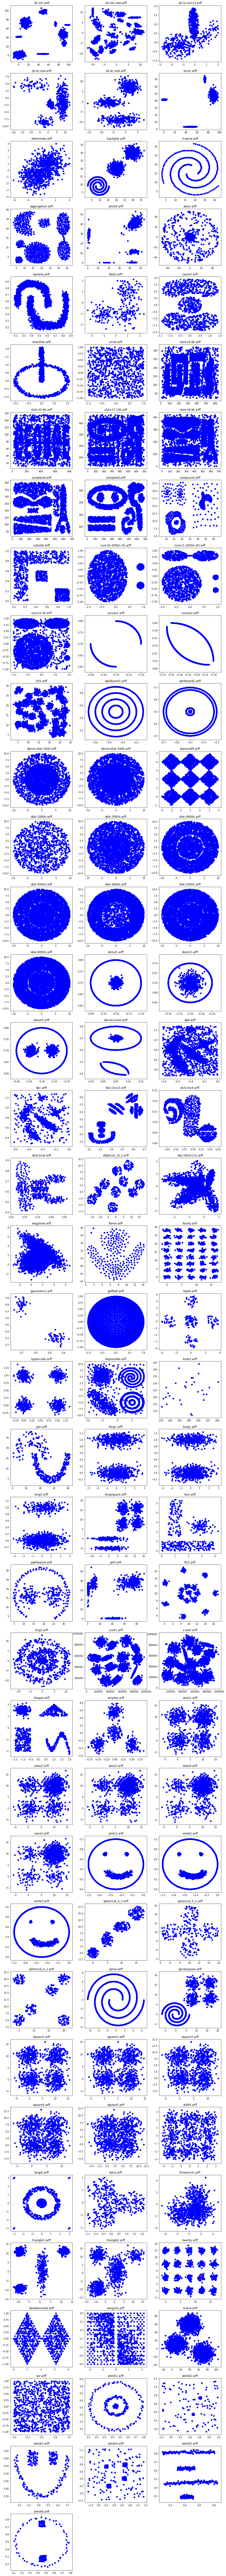

In [86]:
from matplotlib import pyplot as plt

n=len(files)-len(errorfile)
n=n//3+1
i=1

fig=plt.figure(figsize=(16,200))

for f in files:
    if f not in errorfile:
        ax=fig.add_subplot(n,3,i)
        i+=1
        ax.scatter(x_data[f],y_data[f],c='b')
        ax.set_title(f)
plt.show()

# Visualisation des données (avec affichage des clusters)

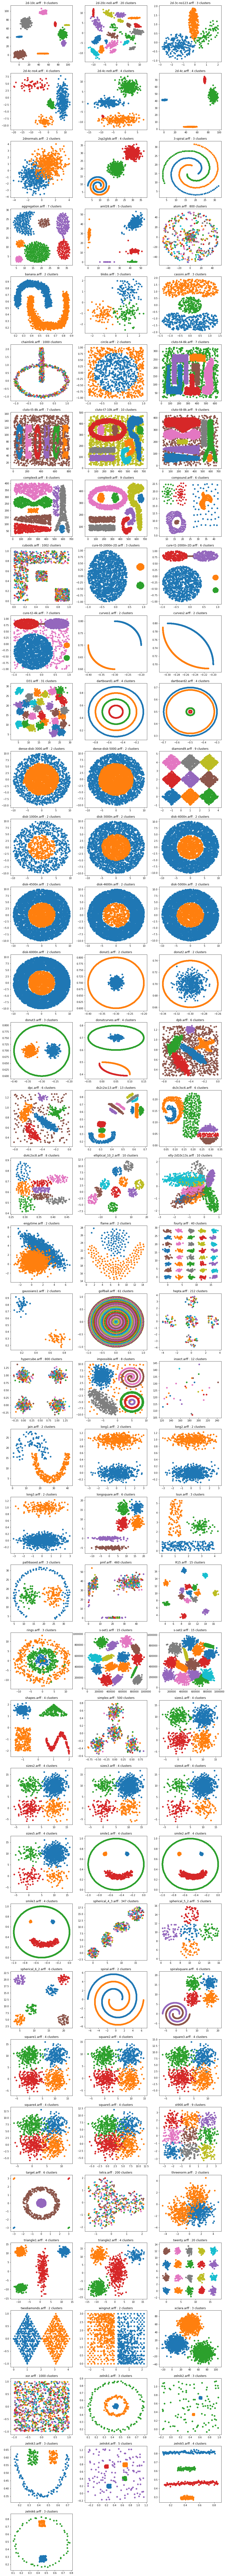

In [93]:
from matplotlib import pyplot as plt


color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

n=len(files)-len(errorfile)
n=n//3+1
i=1
nb=[]

fig=plt.figure(figsize=(16,200))

for f in files:
    if f not in errorfile:
        ax=fig.add_subplot(n,3,i)
        i+=1
        
        lab={}
        for j in range(len(label_data[f])):
            l=label_data[f][j]
            if l not in lab:
                lab[l]=[[x_data[f][j]],[y_data[f][j]]]
            else:
                lab[l][0].append(x_data[f][j])
                lab[l][1].append(y_data[f][j])    
                    
        k=0
        for lb in lab:
            ax.scatter(lab[lb][0],lab[lb][1],c=color[k%10])
            k+=1
        ax.set_title(f+" : "+str(len(lab))+" clusters")
plt.show()

# 2) Clustering k-Means